In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn as sns


In [2]:
def get_leading_eigenvalue(adj_matrix):
    w, v = LA.eig(adj_matrix)
    lamd_i = max(w)
    lamd_i = lamd_i.real
    return lamd_i

In [3]:
##tau -- loop exponent
def tau(alpha, qtilde, q):
    return np.log(alpha) + 1/(2*qtilde**2) -1/(2*q**2)

In [4]:
def get_main_properties(G):
    #number of nodes
    N = G.number_of_nodes()
    print("Number of nodes N:", N)
    
    #number of edges
    L = G.number_of_edges()
    print("Number of edges L:", L)
    
    #Get the basal nodes (in degree = 0 )
    in_degree = list(G.in_degree())
    out_degree = list(G.out_degree())
    
    #number of basal nodes
    B = 0
    
    #number of basal edges
    basal_edges = []
    for i in range(len(in_degree)):
        if in_degree[i][1] == 0:
            B += 1
            basal_edges.append(out_degree[i][1])
            
    print("Number of basal nodes B:", B) ##same as the paper
    
    if B != 0:

        #L_b
        L_b = sum(basal_edges)
        print("Number of basal edges L_B:", L_b) ##same as the paper

        #average degree
        k = sum(d for n, d in G.in_degree()) / float(N)
        print("Average in degree: %8.4f\n" % k)

        #Compute tropich levels
        trophic_levels = nx.algorithms.centrality.trophic_levels(G)
        trophic_levels = [(k, v) for k, v in trophic_levels.items()] 
        s = []
        for i in range(len(trophic_levels)):
            s.append(trophic_levels[i][1])

        x = np.zeros([len(s), len(s)])

        #trophic difference
        for i in range (len(s)):
            for j in range (len(s)):
                x[i, j] = s[i]-s[j]

        #trophic incoherence parameter 
        q = nx.trophic_incoherence_parameter(G)
        q_tilde = np.sqrt( L / L_b -1)

        print("Trophic incoherence parameter q: ", q)
        #quotient
        q_qt = q/q_tilde

        print("Quotient q/q_tilde = ", q_qt)

        s_tilde = 1 + (1- B/N)*(L/L_b)
        s_st = np.mean(s)/s_tilde


        print("Quotient s/s_tilde = ", s_st)

        out = dict(G.out_degree())
        inn = dict(G.in_degree())
        out = list(out.values())
        inn = list(inn.values())

        #compute alpha
        kinkout =0
        for i in range(len(out)):
            kinkout += out[i] * inn[i]

        alpha_num = kinkout / float(N)
        alpha = alpha_num/k
        alpha_tilde = (L - L_b) / (N - B)
        a_at = alpha / alpha_tilde ##again correct

        print("Quotient alpha/alpha_tilde = ", a_at)


        #compute tau
        tauu = tau(alpha, q_tilde, q) ##again correct
        print("Loop exponent tau =", tauu)


        A = nx.adjacency_matrix(G)
        adj_ = pd.DataFrame(A.todense())
        lamda_i = get_leading_eigenvalue(adj_)
    else:
        #if no bassal nodes everything 0
        N = 0
        k =0
        q = 0
        q_tilde =0
        q_qt = 0
        s_st = 0
        a_at = 0
        tauu =0 
        lamda_i = 0
        alpha = 0

    df2 = pd.DataFrame([N, B, round(k, 2), round(q, 2), round(q_tilde, 2), round(q_qt, 2), round(s_st, 2), round(a_at, 2), round(tauu, 2), round(lamda_i, 2), round(alpha, 2)])
    return df2.T
    

In [5]:
import glob
import os
# Get a list of all the dat files
dat_files_food = glob.glob('Network_Data_MJS20/FoodWebs/*.dat')

In [6]:
def get_info(dat_files):
    df_results = pd.DataFrame()
    files_names = []

    for i in range(len(dat_files)):
        x = np.loadtxt(dat_files[i])
        data = pd.DataFrame(x)
        x = list(zip(data[1], data[0]))
        G_ = nx.DiGraph(x)
        G_.remove_edges_from(nx.selfloop_edges(G_))

        df_tmp_res = get_main_properties(G_)
        df_results = df_results.append(df_tmp_res)

        head, tail = os.path.split(dat_files[i])
        files_names.append(tail)
    df_results.index = files_names
    df_results.columns = ['N', 'B', '<k>', '$q$', '$q\'$', 'q/q\'', '$s/s\'$', 'α / α\'', '$\tau$', '$\lambda_1$', '$\\alpha$']
    return df_results

In [7]:
df_result_food = get_info(dat_files_food)

Number of nodes N: 29
Number of edges L: 196
Number of basal nodes B: 2
Number of basal edges L_B: 9
Average in degree:   6.7586

Trophic incoherence parameter q:  0.6892367627066949
Quotient q/q_tilde =  0.1512059514786182
Quotient s/s_tilde =  0.17219344240317278
Quotient alpha/alpha_tilde =  0.6629924697151588
Loop exponent tau = 0.49581753915870275
Number of nodes N: 77
Number of edges L: 240
Number of basal nodes B: 35
Number of basal edges L_B: 216
Average in degree:   3.1169

Trophic incoherence parameter q:  0.1755942292142123
Quotient q/q_tilde =  0.5267826876426368
Quotient s/s_tilde =  1.0196765498652292
Quotient alpha/alpha_tilde =  1.0645833333333332
Loop exponent tau = -12.213248517849875
Number of nodes N: 86
Number of edges L: 375
Number of basal nodes B: 49
Number of basal edges L_B: 338
Average in degree:   4.3605

Trophic incoherence parameter q:  0.18684423703785832
Quotient q/q_tilde =  0.5647252355820788
Quotient s/s_tilde =  1.0090324889717313
Quotient alpha/alph

Trophic incoherence parameter q:  0.601343906039727
Quotient q/q_tilde =  0.37162217806228354
Quotient s/s_tilde =  0.5872564767413381
Quotient alpha/alpha_tilde =  0.6258937395442825
Loop exponent tau = 0.8498319231659772
Number of nodes N: 105
Number of edges L: 343
Number of basal nodes B: 48
Number of basal edges L_B: 262
Average in degree:   3.2667

Trophic incoherence parameter q:  0.3241134072690224
Quotient q/q_tilde =  0.5829148679149672
Quotient s/s_tilde =  0.9890172049133403
Quotient alpha/alpha_tilde =  1.2555879494655005
Loop exponent tau = -2.5633751008349748
Number of nodes N: 71
Number of edges L: 154
Number of basal nodes B: 28
Number of basal edges L_B: 127
Average in degree:   2.1690

Trophic incoherence parameter q:  0.2298120491976761
Quotient q/q_tilde =  0.49841691608484556
Quotient s/s_tilde =  0.9815299764426946
Quotient alpha/alpha_tilde =  1.1375661375661374
Loop exponent tau = -7.451882769689398
Number of nodes N: 78
Number of edges L: 241
Number of basal n

In [8]:
df_result_food

,N,B,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$
benguela.dat,29.0,2.0,6.76,0.69,4.56,0.15,0.17,0.66,0.50,2.00,4.59
Berwicktxt.dat,77.0,35.0,3.12,0.18,0.33,0.53,1.02,1.06,-12.21,0.00,0.61
Blackrocktxt.dat,86.0,49.0,4.36,0.19,0.33,0.56,1.01,1.27,-9.51,0.00,1.27
bridge.dat,25.0,8.0,4.16,0.53,1.43,0.37,0.68,0.69,-0.52,1.00,2.86
Broadtxt.dat,94.0,53.0,6.00,0.14,0.28,0.49,1.03,1.19,-20.10,0.00,1.16
broom.dat,85.0,1.0,2.58,0.40,2.85,0.14,0.30,1.17,-2.08,0.00,2.72
canton.dat,102.0,54.0,6.82,0.15,0.27,0.57,1.01,1.22,-14.52,0.00,1.20
Catlins.dat,48.0,14.0,2.29,0.20,0.49,0.41,0.96,1.00,-10.90,0.00,0.62
cayman_islands.dat,242.0,10.0,15.55,0.77,3.18,0.24,0.29,0.51,1.22,0.00,7.52
chesapeake.dat,31.0,5.0,2.16,0.45,1.38,0.32,0.73,0.89,-1.81,0.00,1.51


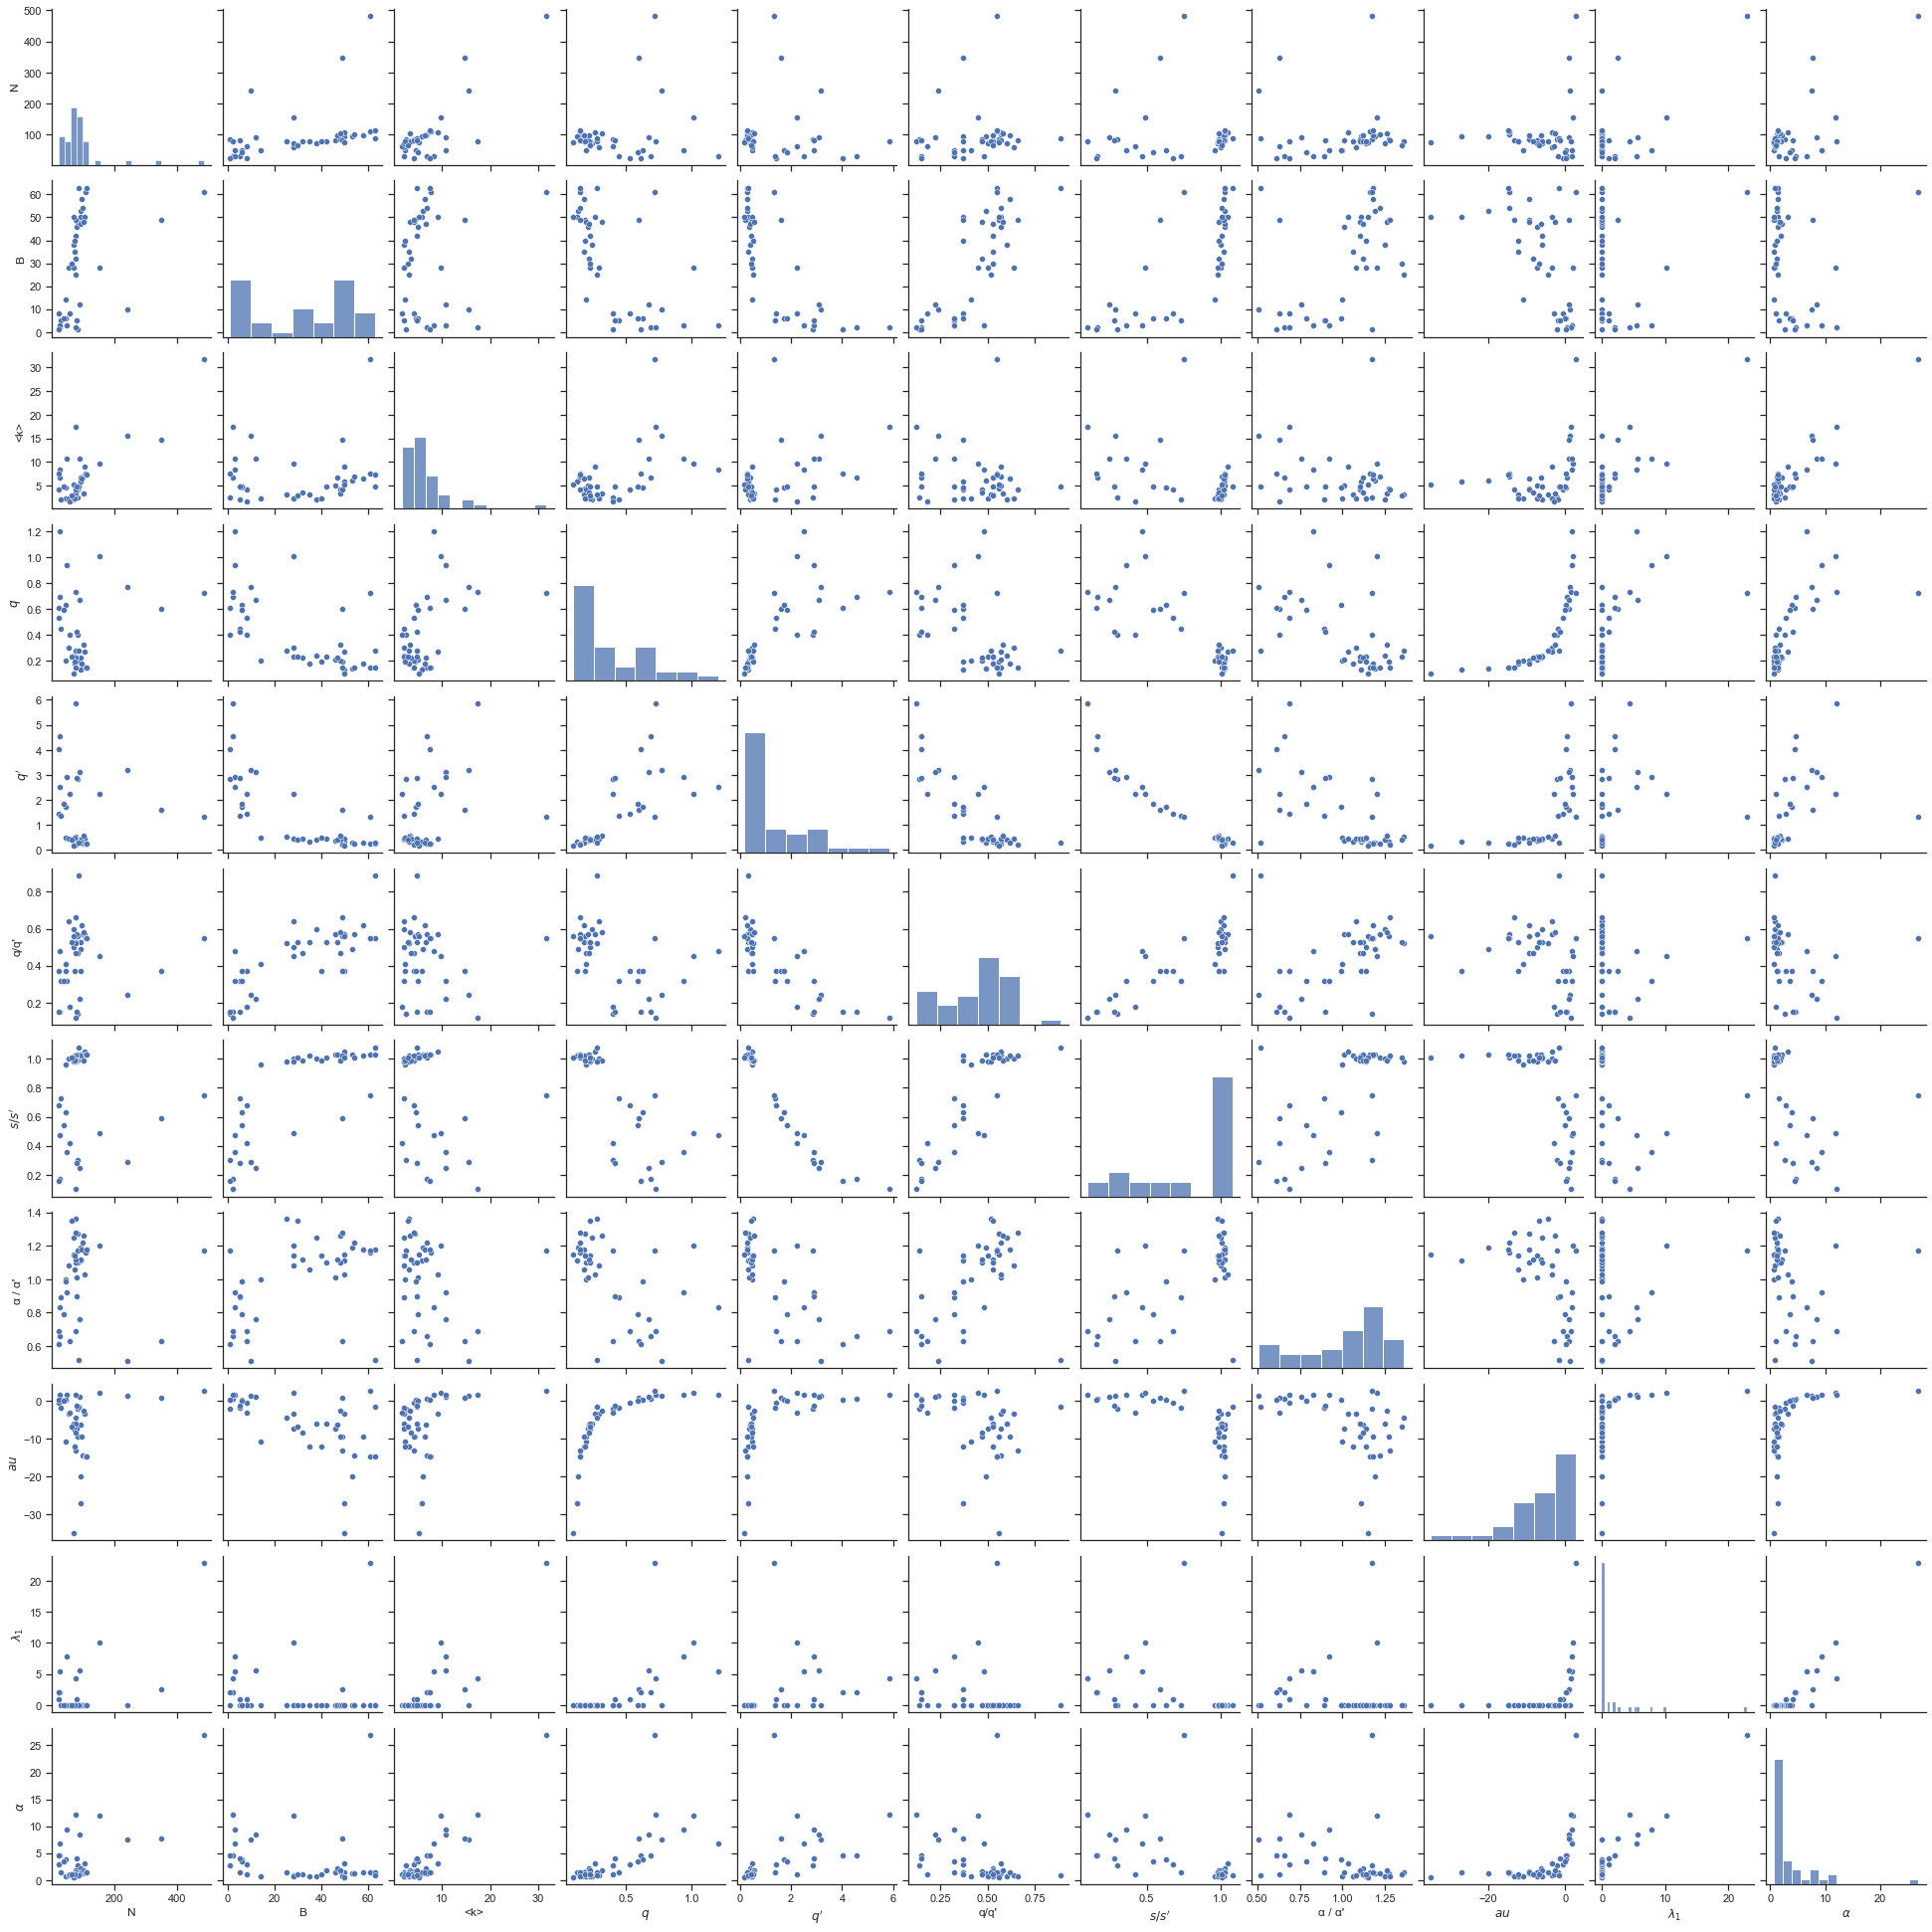

In [9]:
sns.set_theme(style="ticks")
sns.pairplot(df_result_food)

In [10]:
dat_files_genetic = glob.glob('Network_Data_MJS20/Genetic/*.dat')
df_result_genetic = get_info(dat_files_genetic)

Number of nodes N: 4049
Number of edges L: 11707
Number of basal nodes B: 3967
Number of basal edges L_B: 11623
Average in degree:   2.8913

Trophic incoherence parameter q:  0.08485684665226498
Quotient q/q_tilde =  0.9981742562908585
Quotient s/s_tilde =  1.0000025673789443
Quotient alpha/alpha_tilde =  1.0740846949525518
Loop exponent tau = -0.15775354898629246
Number of nodes N: 418
Number of edges L: 519
Number of basal nodes B: 312
Number of basal edges L_B: 475
Average in degree:   1.2416

Trophic incoherence parameter q:  0.26731397725295536
Quotient q/q_tilde =  0.8782984861823215
Quotient s/s_tilde =  0.9940933149295565
Quotient alpha/alpha_tilde =  0.9376423191452093
Loop exponent tau = -2.5431472843709155
Number of nodes N: 1470
Number of edges L: 2909
Number of basal nodes B: 1316
Number of basal edges L_B: 2769
Average in degree:   1.9789

Trophic incoherence parameter q:  0.23148580321628687
Quotient q/q_tilde =  1.029489262637822
Quotient s/s_tilde =  1.0000651989268314

In [11]:
df_result_genetic

,N,B,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$
net_cancer.dat,4049.0,3967.0,2.89,0.08,0.09,1.00,1.00,1.07,-0.16,2.54,1.10
net_coli.dat,418.0,312.0,1.24,0.27,0.30,0.88,0.99,0.94,-2.54,0.00,0.39
net_e_coli.dat,1470.0,1316.0,1.98,0.23,0.22,1.03,1.00,1.21,0.65,1.62,1.10
net_m_tuberculosis.dat,1624.0,1542.0,1.95,0.17,0.17,1.02,1.00,1.24,0.99,2.00,1.28
net_non_cancer.dat,4071.0,4004.0,2.08,0.08,0.08,0.99,1.00,0.99,-1.54,1.00,0.87
net_p_aeruginosa.dat,691.0,606.0,1.43,0.30,0.30,1.00,1.03,1.94,0.58,1.41,1.85
net_s_cerevisiae.dat,2933.0,2764.0,2.10,0.17,0.18,0.98,1.00,1.29,-0.38,1.00,1.43
net_yeast.dat,688.0,557.0,1.57,0.25,0.24,1.04,1.00,0.81,-0.31,1.32,0.36


In [12]:
dat_files_Language = glob.glob('Network_Data_MJS20/Language/*.dat')
df_result_Language = get_info(dat_files_Language)

Number of nodes N: 50
Number of edges L: 101
Number of basal nodes B: 16
Number of basal edges L_B: 20
Average in degree:   2.0200

Trophic incoherence parameter q:  2.0372783429080203
Quotient q/q_tilde =  1.0123317475178801
Quotient s/s_tilde =  1.1634372600543204
Quotient alpha/alpha_tilde =  1.550177239946217
Loop exponent tau = 1.3094473677848357


In [13]:
df_result_Language

,N,B,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$
net_green_eggs.dat,50.0,16.0,2.02,2.04,2.01,1.01,1.16,1.55,1.31,3.17,3.69


In [14]:
dat_files_Metabolic = glob.glob('Network_Data_MJS20/Metabolic/*.dat')
df_result_Metabolic = get_info(dat_files_Metabolic)

Number of nodes N: 1267
Number of edges L: 3011
Number of basal nodes B: 36
Number of basal edges L_B: 55
Average in degree:   2.3765

Trophic incoherence parameter q:  13.789932731132666
Quotient q/q_tilde =  1.8810107498820579
Quotient s/s_tilde =  2.0599459100362236
Quotient alpha/alpha_tilde =  4.344486544375631
Loop exponent tau = 2.3515915146192605
Number of nodes N: 1172
Number of edges L: 2864
Number of basal nodes B: 40
Number of basal edges L_B: 55
Average in degree:   2.4437

Trophic incoherence parameter q:  13.287751982717316
Quotient q/q_tilde =  1.8593321915307652
Quotient s/s_tilde =  2.0428450076609805
Quotient alpha/alpha_tilde =  4.597101594833845
Loop exponent tau = 2.4412267173164497
Number of nodes N: 386
Number of edges L: 792
Number of basal nodes B: 20
Number of basal edges L_B: 25
Average in degree:   2.0518

Trophic incoherence parameter q:  8.977152433195084
Quotient q/q_tilde =  1.6207309364032283
Quotient s/s_tilde =  1.7041910179092001
Quotient alpha/alph

In [15]:
df_result_Metabolic

,N,B,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$
net_AG.dat,1267.0,36.0,2.38,13.79,7.33,1.88,2.06,4.34,2.35,7.62,10.43
net_CE.dat,1172.0,40.0,2.44,13.29,7.15,1.86,2.04,4.60,2.44,8.00,11.41
net_CQ.dat,386.0,20.0,2.05,8.98,5.54,1.62,1.70,2.55,1.69,5.57,5.34
net_CT.dat,446.0,19.0,2.11,11.77,6.05,1.94,2.02,2.77,1.79,6.07,5.93
net_MJ.dat,1081.0,32.0,2.40,12.47,6.73,1.85,1.98,4.00,2.27,7.53,9.65
net_SC.dat,1510.0,43.0,2.54,14.61,8.45,1.73,1.82,5.54,2.66,9.15,14.29
net_TH.dat,1111.0,30.0,2.43,12.17,6.88,1.77,1.90,4.08,2.31,7.59,9.99


In [16]:
dat_files_neural = glob.glob('Network_Data_MJS20/Neural/*.dat')
df_result_neural = get_info(dat_files_neural)

Number of nodes N: 65
Number of edges L: 1139
Number of basal nodes B: 0
Number of nodes N: 213
Number of edges L: 21654
Number of basal nodes B: 0
Number of nodes N: 297
Number of edges L: 2345
Number of basal nodes B: 3
Number of basal edges L_B: 175
Average in degree:   7.8956

Trophic incoherence parameter q:  1.4940696856108986
Quotient q/q_tilde =  0.42428727956625073
Quotient s/s_tilde =  0.3884305854959347
Quotient alpha/alpha_tilde =  1.4211073663938372
Loop exponent tau = 2.166671835080633
Number of nodes N: 503
Number of edges L: 27667
Number of basal nodes B: 0
Number of nodes N: 502
Number of edges L: 30079
Number of basal nodes B: 0
Number of nodes N: 493
Number of edges L: 33011
Number of basal nodes B: 0
Number of nodes N: 242
Number of edges L: 4090
Number of basal nodes B: 0
Number of nodes N: 91
Number of edges L: 628
Number of basal nodes B: 0


In [17]:
df_result_neural

,N,B,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$
cat_brain.dat,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mouse_brain_1.dat,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
net_celegans_neural.dat,297.0,3.0,7.9,1.49,3.52,0.42,0.39,1.42,2.17,9.15,10.49
rat_brain_1.dat,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
rat_brain_2.dat,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
rat_brain_3.dat,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
rhesus_brain_1.dat,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
rhesus_brain_2.dat,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [18]:
df_result_neural= df_result_neural[(df_result_neural.T != 0).any()]
df_result_neural

,N,B,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$
net_celegans_neural.dat,297.0,3.0,7.9,1.49,3.52,0.42,0.39,1.42,2.17,9.15,10.49


In [19]:
#social bring problems and has 0 bassal nodes
#dat_files_social = glob.glob('Network_Data_MJS20/Social/*.dat')
#df_result_social = get_info(dat_files_social)

In [20]:
#df_result_social

In [21]:
dat_files_Trade = glob.glob('Network_Data_MJS20/Trade/*.dat')
df_result_Trade = get_info(dat_files_Trade)

Number of nodes N: 24
Number of edges L: 310
Number of basal nodes B: 2
Number of basal edges L_B: 21
Average in degree:  12.9167

Trophic incoherence parameter q:  4.240100278629447
Quotient q/q_tilde =  1.1429753224131052
Quotient s/s_tilde =  1.1375401763758175
Quotient alpha/alpha_tilde =  1.1042973546154706
Loop exponent tau = 2.683114595985681
Number of nodes N: 24
Number of edges L: 307
Number of basal nodes B: 0
Number of nodes N: 24
Number of edges L: 369
Number of basal nodes B: 0
Number of nodes N: 24
Number of edges L: 307
Number of basal nodes B: 0
Number of nodes N: 24
Number of edges L: 135
Number of basal nodes B: 3
Number of basal edges L_B: 8
Average in degree:   5.6250

Trophic incoherence parameter q:  4.214549034053207
Quotient q/q_tilde =  1.0577773029824413
Quotient s/s_tilde =  0.9684734918447497
Quotient alpha/alpha_tilde =  1.2799650043744533
Loop exponent tau = 2.0498441371034284


In [22]:
df_result_Trade

,N,B,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$
net_trade_basic.dat,24.0,2.0,12.92,4.24,3.71,1.14,1.14,1.10,2.68,14.30,14.51
net_trade_crude.dat,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
net_trade_diplomats.dat,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
net_trade_food.dat,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
net_trade_minerals.dat,24.0,3.0,5.62,4.21,3.98,1.06,0.97,1.28,2.05,7.25,7.74


In [23]:
df_result_Trade= df_result_Trade[(df_result_Trade.T != 0).any()]
df_result_Trade

,N,B,<k>,$q$,$q'$,q/q',$s/s'$,α / α',$\tau$,$\lambda_1$,$\alpha$
net_trade_basic.dat,24.0,2.0,12.92,4.24,3.71,1.14,1.14,1.10,2.68,14.30,14.51
net_trade_minerals.dat,24.0,3.0,5.62,4.21,3.98,1.06,0.97,1.28,2.05,7.25,7.74


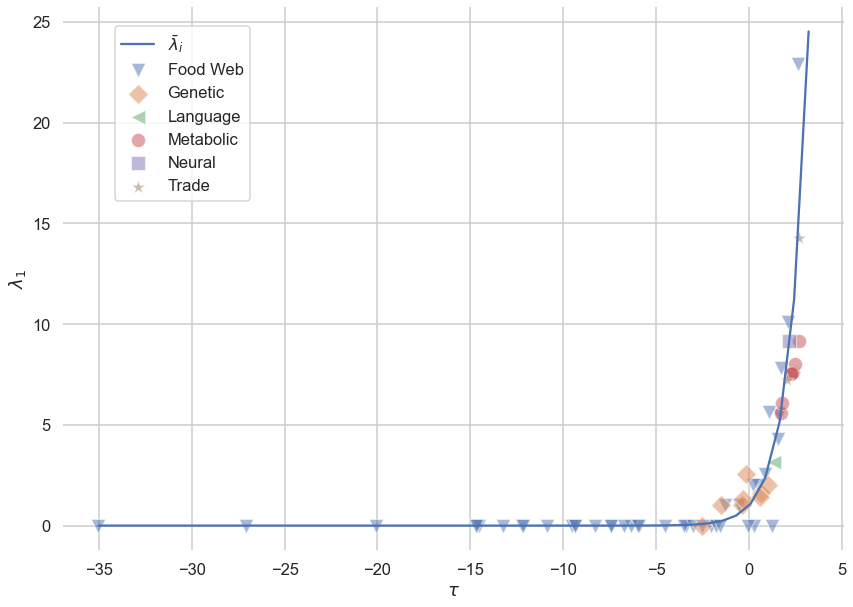

In [24]:
plt.figure(figsize=(14,10))
x = np.linspace(-35, 3.2)
y = np.exp(x)
sns.set_style("whitegrid")
sns.set_context("talk")

sns.scatterplot(data=df_result_food, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "v", label = 'Food Web')
sns.scatterplot(data=df_result_genetic, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "D", label = 'Genetic')
sns.scatterplot(data=df_result_Language, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "<", label = 'Language')
sns.scatterplot(data=df_result_Metabolic, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted",  label = 'Metabolic')
sns.scatterplot(data=df_result_neural, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "s", label = 'Neural')
sns.scatterplot(data=df_result_Trade, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "*", label = 'Trade')
plt.plot(x, y, label = '$\\bar{\\lambda}_i$')
sns.despine(left=True, bottom=True)
plt.xlabel('$\\tau$')
plt.legend(loc='upper right', bbox_to_anchor=(0.25, 0.98))

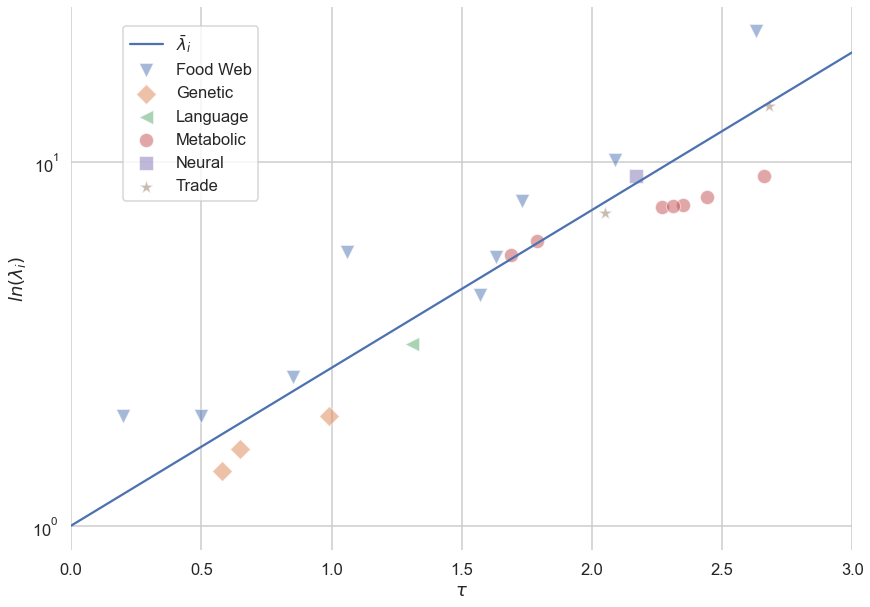

In [25]:
plt.figure(figsize=(14,10))
x = np.linspace(0, 3)
y = np.exp(x)
sns.set_style("whitegrid")
sns.set_context("talk")

sns.scatterplot(data=df_result_food, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "v", label = 'Food Web')
sns.scatterplot(data=df_result_genetic, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "D", label = 'Genetic')
sns.scatterplot(data=df_result_Language, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "<", label = 'Language')
sns.scatterplot(data=df_result_Metabolic, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted",  label = 'Metabolic')
sns.scatterplot(data=df_result_neural, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "s", label = 'Neural')
sns.scatterplot(data=df_result_Trade, x="$\tau$", y="$\\lambda_1$", alpha=.5, s= 200,  palette="muted", marker = "*", label = 'Trade')
plt.plot(x, y, label = '$\\bar{\\lambda}_i$')
sns.despine(left=True, bottom=True)
plt.xlabel('$\\tau$')
plt.ylabel('$ln(\\lambda_i)$')
plt.yscale("log")
plt.xlim(0,3)
plt.legend(loc='upper right', bbox_to_anchor=(0.25, 0.98))

In [26]:
def y_plot(q, qt):
    return 1/(np.array(q)**2) -  1/(np.array(qt)**2)

In [31]:
df_result_food["y"] = y_plot(df_result_food['$q$'],df_result_food['$q\'$'] )


In [32]:

df_result_genetic["y"] = y_plot(df_result_genetic['$q$'],df_result_genetic['$q\'$'] )


In [33]:
df_result_Language["y"] = y_plot(df_result_Language['$q$'],df_result_Language['$q\'$'] )


In [34]:
df_result_Metabolic["y"] = y_plot(df_result_Metabolic['$q$'],df_result_Metabolic['$q\'$'] )


In [ ]:
df_result_neural["y"] = y_plot(df_result_neural['$q$'],df_result_neural['$q\'$'] )



In [ ]:
df_result_Trade["y"] = y_plot(df_result_Trade['$q$'],df_result_Trade['$q\'$'] )


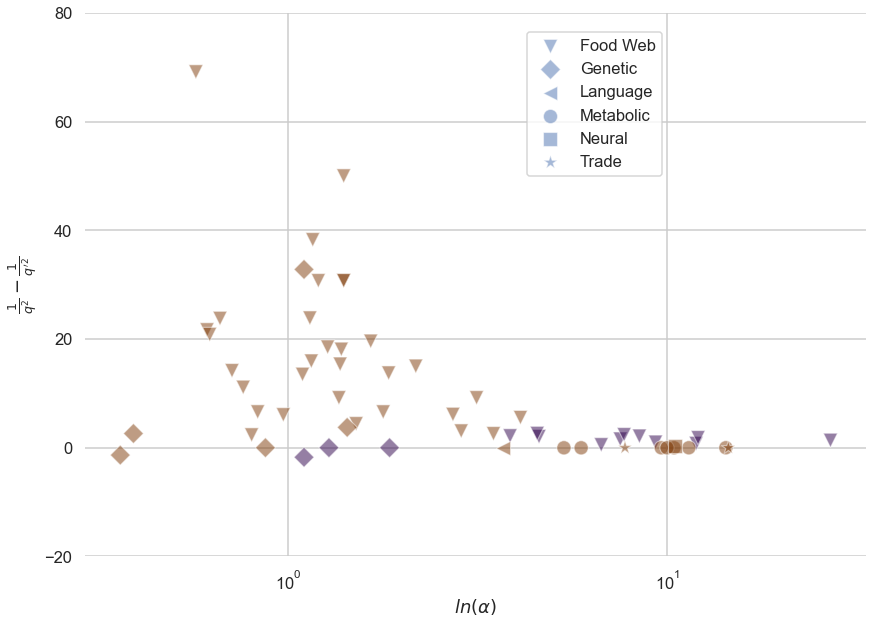

In [68]:
plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
sns.set_context("talk")

cmap = plt.get_cmap('PuOr')
cmaplist = [cmap(i) for i in range(2)]



sns.scatterplot(data=df_result_food, x="$\\alpha$", y="y", alpha=.5, c=np.sign(df_result_food['$\tau$']), s= 200,  cmap=cmap, marker = "v", label = 'Food Web')

sns.scatterplot(data=df_result_genetic, x="$\\alpha$", y="y", alpha=.5,  c=np.sign(df_result_genetic['$\tau$']),s= 200,  cmap=cmap, marker = "D", label = 'Genetic')
sns.scatterplot(data=df_result_Language,x="$\\alpha$", y="y", alpha=.5,  c=np.sign(df_result_Language['$\tau$']),s= 200,  cmap=cmap, marker = "<", label = 'Language')
sns.scatterplot(data=df_result_Metabolic, x="$\\alpha$", y="y", alpha=.5,  c=np.sign(df_result_Metabolic['$\tau$']),s= 200, cmap=cmap,  label = 'Metabolic')
sns.scatterplot(data=df_result_neural, x="$\\alpha$", y="y", alpha=.5, c=np.sign(df_result_neural['$\tau$']), s= 200, cmap=cmap, marker = "s", label = 'Neural')
sns.scatterplot(data=df_result_Trade, x="$\\alpha$", y="y", alpha=.5,  c=np.sign(df_result_Trade['$\tau$']),s= 200,  cmap=cmap, marker = "*", label = 'Trade')

plt.xscale("log")


sns.despine(left=True, bottom=True)
plt.ylabel('$\\frac{1}{q^2} - \\frac{1}{q\'^2}$')
plt.xlabel('$ln(\\alpha)$')
plt.ylim(-20,80)
plt.legend(loc='upper right', bbox_to_anchor=(0.75, 0.98))